In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
#%matplotlib qt

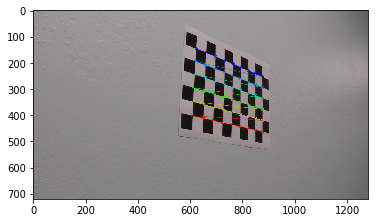

In [2]:
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

images = glob.glob('camera_cal/calibration*.jpg')


for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        plt.imshow(img)
        cv2.waitKey(500)
        
cv2.destroyAllWindows()

In [7]:
def calibrate_undistort(img):
    img1 = cv2.imread("camera_cal/"+img)
    img_size = (img1.shape[1], img1.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img1, mtx, dist, None, mtx)
    #cv2.imwrite("output_images/" + img , dst)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.imshow(dst)


In [4]:
output_images = []
for image in images:
    output_images.append(image.split("\\")[1])
    

In [10]:
%matplotlib inline

#img = cv2.imread('camera_cal/calibration1.jpg')
img = cv2.imread('test_images/straight_lines1.jpg')

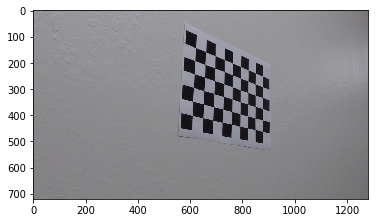

In [8]:
for image in output_images:
    calibrate_undistort(image)
    

In [13]:
img = cv2.imread('test_images/straight_lines2.jpg')
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
#dst = cv2.undistort(img, mtx, dist, None, mtx)
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
#plt.imshow(dst)

In [4]:
def corners_unwarp(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        offset = 100 
        img_size = (gray.shape[1], gray.shape[0])
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst)        
    warped = cv2.warpPerspective(undist, M, img_size)

    return warped, M


In [14]:

top_down, perspective_M = corners_unwarp(img, 9, 6, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

UnboundLocalError: local variable 'src' referenced before assignment